This notebook is used to generate eps plots from the csv data exported from Tensorboard

In [1]:
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
extension = 'csv'
csv = [i[:-4] for i in glob.glob('*.{}'.format(extension))]
print('The following csv files were found on ./')
print(csv)

The following csv files were found on ./
['ae-stacked-long-gaus', 'm_3d', 'm_1d2d_01', 'm_1d2d_01_reg', 'm_1d2d', 'm_1d', 'm_resnet']


In [3]:
for i, el in enumerate(csv):
    if i == 0:
        df = pd.read_csv('{}.csv'.format(el))
        df = df.drop(['Wall time', 'Step'], axis=1)
        df = df.rename(columns={'Value': el})
    else:
        df_temp = pd.read_csv('{}.csv'.format(el))
        if len(df_temp.index) > len(df.index):
            df = df.reindex(df_temp.index)
        df[el] = df_temp['Value']
df['steps'] = df.index.values
df.head()

,ae-stacked-long-gaus,m_3d,m_1d2d_01,m_1d2d_01_reg,m_1d2d,m_1d,m_resnet,steps
0,0.816865,0.701607,0.782158,0.764664,0.748668,0.781092,0.452774,0
1,0.879758,0.859761,0.897238,0.885535,0.866456,0.883154,0.782334,1
2,0.899984,0.890014,0.925825,0.915954,0.888244,0.906587,0.835447,2
3,0.910177,0.905335,0.940013,0.932029,0.901750,0.916767,0.870773,3
4,0.918063,0.916785,0.947057,0.939576,0.912023,0.925352,0.886079,4


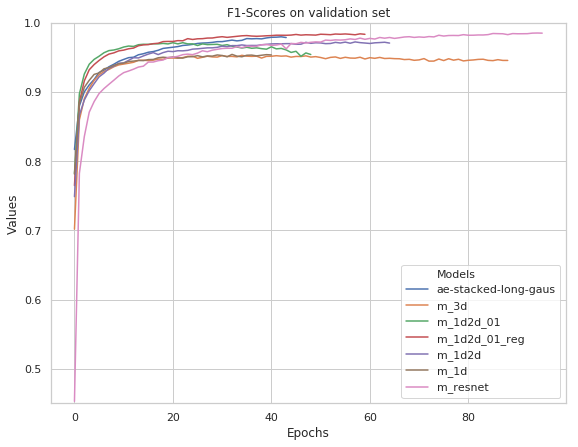

In [4]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
fig.tight_layout()
df_melt = df.melt('steps', var_name='Models', value_name='vals')
sns.lineplot(x='steps', y='vals', hue='Models', data=df_melt, ax=ax)
ax.set_ylabel('Values')
ax.set_xlabel('Epochs')
ax.set_ylim([0.45, 1])
ax.set_title('F1-Scores on validation set')
fig.savefig('f1-validation.eps')